In [1]:
import pandas
import statsmodels.api as stats_api
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
plot.style.use('ggplot')
%matplotlib inline

plot.rcParams["figure.figsize"]=(10,8) # Default figure size (see end)

In [2]:
iris_d = datasets.load_iris()

In [3]:
iris_d.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris_d['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_df_dat = pandas.DataFrame(iris_d['data'], columns=iris_d['feature_names'])

In [6]:
iris_df_dat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_df_tg = pandas.DataFrame(iris_d['target'],columns=['species'])

In [8]:
iris_dat = pandas.concat([iris_df_dat,iris_df_tg],axis=1)

In [9]:
rfc = RandomForestClassifier(max_depth=5,n_estimators=10)
X = iris_dat.iloc[:,:4] # Independent Variables
y = iris_dat.iloc[:,4] # Dependent variable (species)

X_Train,X_Test,y_Train,y_Test = train_test_split(X, y, test_size=0.3)

rfc.fit(X_Train,y_Train)
y_pred = rfc.predict(X_Test)

rf = pandas.DataFrame(zip(y_pred,y_Test), columns=['predict','actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predict']==r['actual'] else 0, axis=1)
rf['correct'].sum()/rf['correct'].count()

0.9555555555555556

([<matplotlib.axis.XTick at 0x1f19339c490>,
 [Text(0, 0, 'petal length (cm)'),
  Text(1, 0, 'petal width (cm)'),
  Text(2, 0, 'sepal length (cm)'),
  Text(3, 0, 'sepal width (cm)')])

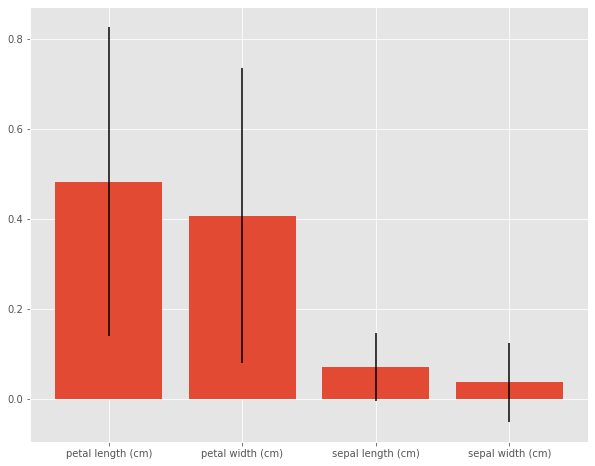

In [10]:
feat_import = rfc.feature_importances_
feat_names = iris_dat.columns[:4]
feat_stdev = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
feat_importances_zip = zip(feat_import,feat_names,feat_stdev)
feat_importances_zip_sort = sorted(feat_importances_zip, key=lambda x: x[0], reverse=True)

importances = [x[0] for x in feat_importances_zip_sort]
labels = [x[1] for x in feat_importances_zip_sort]
errors = [x[2] for x in feat_importances_zip_sort]

plot.bar(range(len(feat_import)), importances, yerr=errors, align='center')
plot.xticks(range(len(feat_import)), labels)